<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/main/torre_comportanmiento%20energetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from IPython.display import Image

Mounted at /content/drive


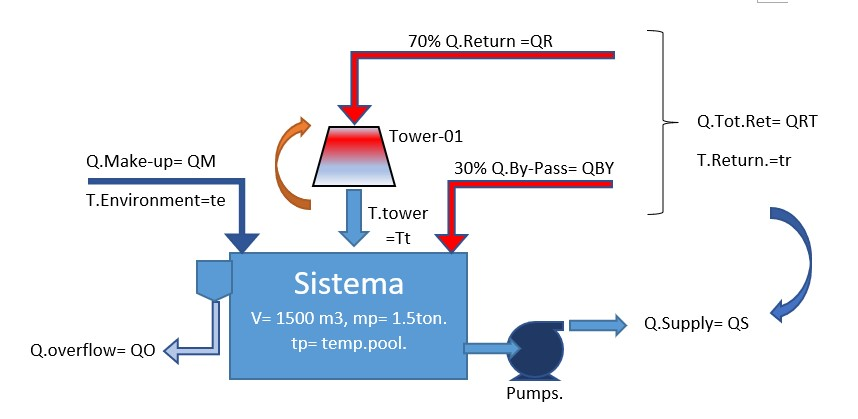

In [5]:
#@title "Ejecutar para recargar imagen"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
Image('/content/drive/MyDrive/ESQUEMATORRE.jpg')

In [10]:

from prompt_toolkit.layout.dimension import D
#@title "Ejecutar Celda"
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/TOMA%20TEMP.csv" #@param {type:"string"}
tab = True # @param {type:"boolean"}
datos = pd.read_csv(Url,sep=",",decimal=".")
df=pd.DataFrame(datos)
dfx=df.copy()
if tab:
   print(dfx)


           date       time  QENTRADA  REPOSICION  QRETORNO  TTORRE  TRETORNO  \
0     12/2/2023   05:00:00     11240         280     11510    34.9      39.6   
1     12/2/2023   05:01:00     11480         270     11590    35.1      39.6   
2     12/2/2023   05:02:00     11350         240     11620    35.0      39.7   
3     12/2/2023   05:03:00     11370         280     11730    35.0      39.6   
4     12/2/2023   05:04:00     11270         285     11670    34.9      39.5   
...         ...        ...       ...         ...       ...     ...       ...   
1436  13/2/2319   04:56:00     11290         263     11450    37.9      42.1   
1437  13/2/2320   04:57:00     11220         259     11650    37.8      42.1   
1438  13/2/2321   04:58:00     11240         268     11630    37.6      42.1   
1439  13/2/2322   04:59:00     11300         304     11680    37.8      42.0   
1440  13/2/2323   05:00:00     11310         289     11590    37.4      41.7   

      TDIA  
0       31  
1       31  


Cantidad de items sampleados:  1441
Fecha de la muestra:  12/2/2023 -  05:00:00 al 13/2/2323 -  05:00:00


/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


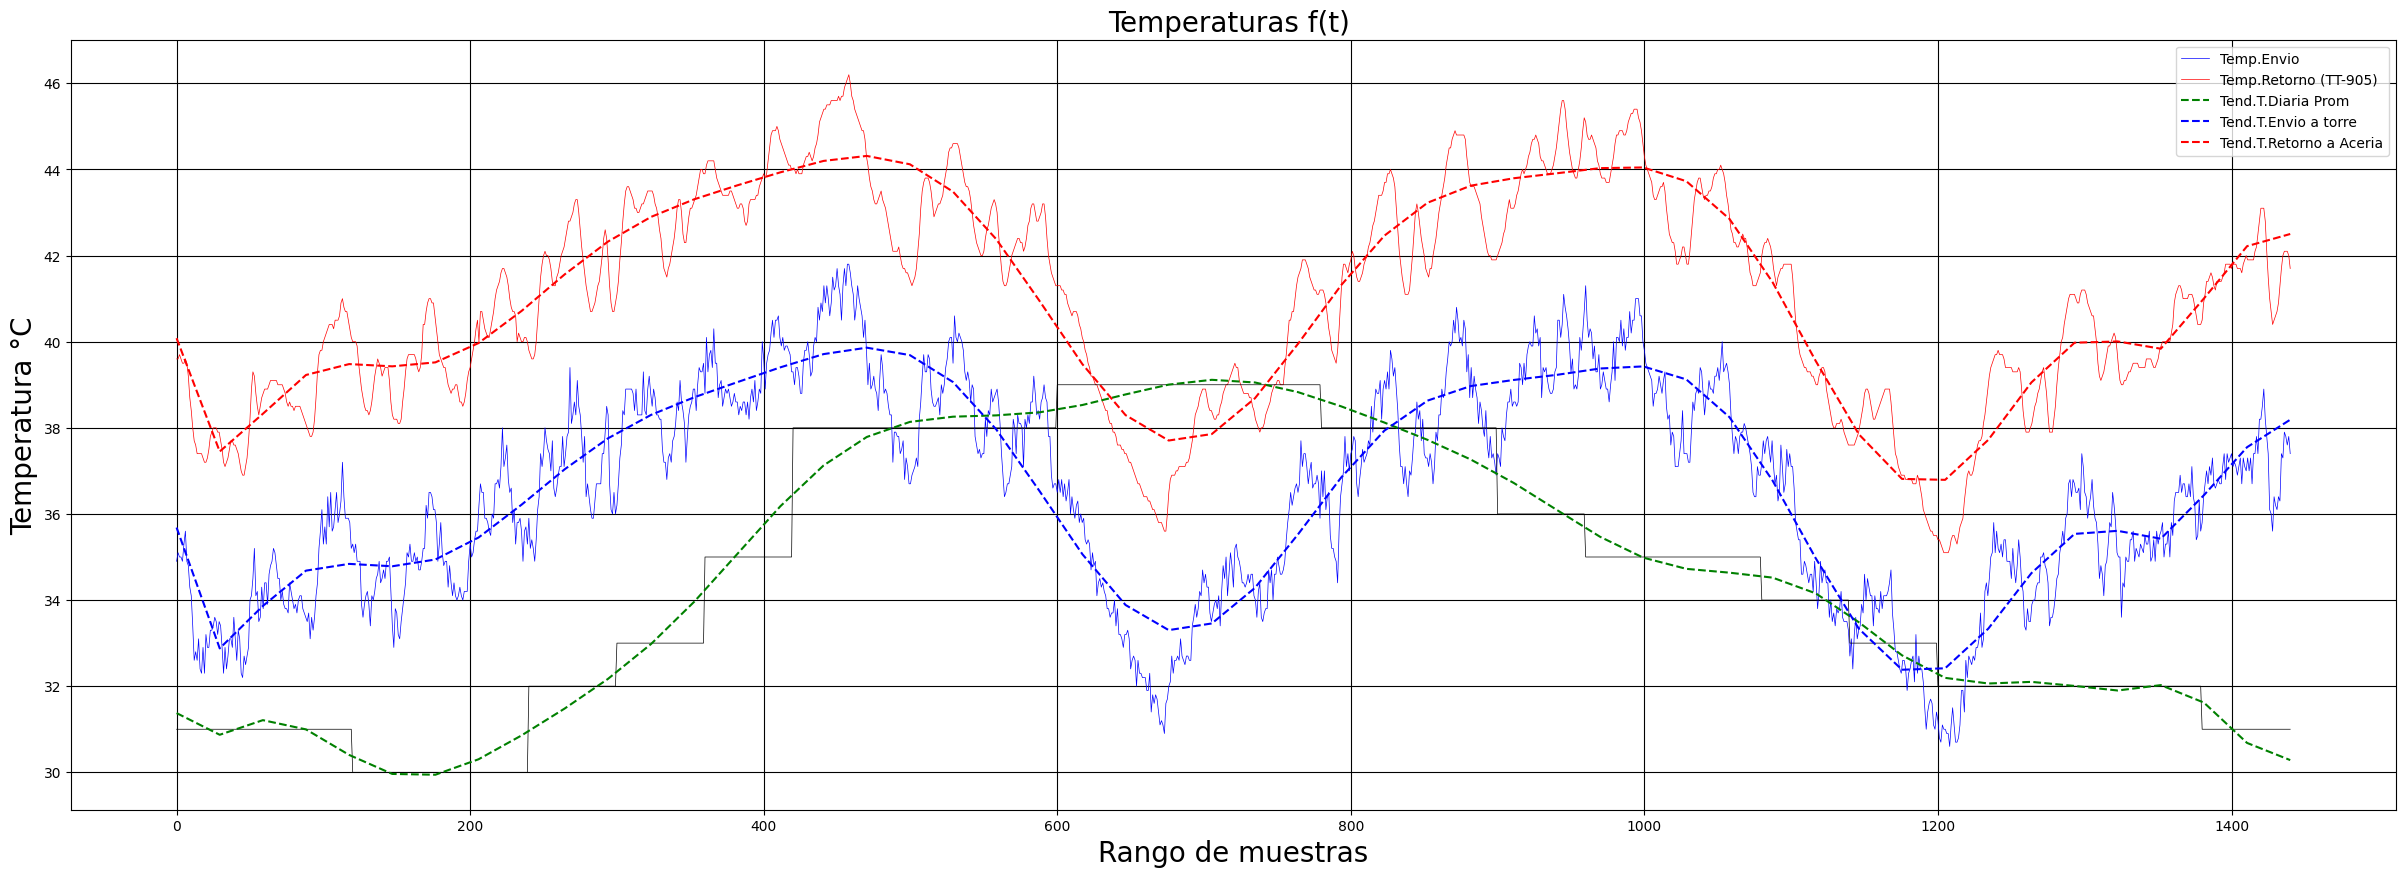

In [9]:
from matplotlib.ticker import AutoLocator
from io import DEFAULT_BUFFER_SIZE
from matplotlib.ticker import MaxNLocator
#@title Seleccionar parametros y ejecuar celda
#InstrumentoParametro = 'PIR171' #@param {type:"raw"}
#x = 'FQI171' #@param {type:"raw"}
#y = 'PIR171' #@param {type:"raw"}
text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
text3='Temperatura °C'
print('Cantidad de items sampleados: ', len(dfx.index))
print('Fecha de la muestra: ',dfx.date[0],'-',dfx.time[0], 'al',dfx.date[(len(dfx.index)-1)],'-',dfx.time[(len(dfx.index)-1)])
#print('Muestreo cada 1 minuto 30 seg ')

# Grado del polinomio de tendencia (ajusta según tus necesidades)
grado_polinomio = 30

# Ajustar el polinomio de tendencia a los datos
coefficients = np.polyfit( dfx.index,dfx['TDIA'], grado_polinomio)
coefficients1 = np.polyfit( dfx.index,dfx['TTORRE'], grado_polinomio)
coefficients2 = np.polyfit( dfx.index,dfx['TRETORNO'], grado_polinomio)
polynomial = np.poly1d(coefficients)
polynomial1 = np.poly1d(coefficients1)
polynomial2 = np.poly1d(coefficients2)
# Crear valores x para la línea de tendencia
x_trendline = np.linspace(dfx.index.min(), dfx.index.max())
x_trendline1 = np.linspace(dfx.index.min(), dfx.index.max())
x_trendline2 = np.linspace(dfx.index.min(), dfx.index.max())
# Calcular valores y correspondientes para la línea de tendencia polinómica
y_trendline = polynomial(x_trendline)
y_trendline1 = polynomial1(x_trendline1)
y_trendline2 = polynomial2(x_trendline2)


# Grestion final del gradico .......
fig, (ax1)= plt.subplots(1, figsize=(30,10))
ax1.plot(dfx.index,dfx['TTORRE'],linewidth=0.5,color='blue',label=f'Temp.Envio')
ax1.plot(dfx.index,dfx['TRETORNO'],linewidth=0.5,color='red',label=f'Temp.Retorno (TT-905)')
ax1.plot(dfx.index,dfx['TDIA'],linewidth=0.5,color='black')
ax1.plot(x_trendline, y_trendline, label=f'Tend.T.Diaria Prom', color='green',linestyle='--')
ax1.plot(x_trendline1, y_trendline1, label=f'Tend.T.Envio a torre', color='blue',linestyle='--')
ax1.plot(x_trendline2, y_trendline2, label=f'Tend.T.Retorno a Aceria', color='red',linestyle='--')
ax1.set_title('Temperaturas f(t) ',fontsize=20)
ax1.set_xlabel(text2,fontsize=20)
ax1.set_ylabel(text3,fontsize=20)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
#ax1.xaxis.set_major_locator(MultipleLocator(100))
#ax1.xaxis.set_minor_locator(MultipleLocator(20))
#ax1.axhline(y=dfx['PIR171'].mean(),linewidth=2,color='black')
#ax1.axhline(y=np.amax(dfx['PIR171']), linewidth=2, color='green')
#ax1.axhline(y=np.amin(dfx['PIR171']), linewidth=2, color='blue')
#ax1.axhline(y=14,linewidth=2,color='black')
#ax1.axhline(y=13,linewidth=2,color='red')
labels2 = ax1.get_xticklabels()
labels3= ax1.get_yticklabels()
#plt.setp(labels2, rotation=60,fontsize=8, horizontalalignment='right')
plt.setp(labels3,fontsize=10, horizontalalignment='right')
ax1.axes.grid(True, which='minor',color='grey',axis='both')
ax1.axes.grid(True, which='major',color='black',axis='both')
ax1.legend()

# Mostrar el gráfico
plt.show()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1441 entries, 0 to 1440
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1441 non-null   object 
 1   time        1441 non-null   object 
 2   QENTRADA    1441 non-null   int64  
 3   REPOSICION  1441 non-null   int64  
 4   QRETORNO    1441 non-null   int64  
 5   TTORRE      1441 non-null   float64
 6   TRETORNO    1441 non-null   float64
 7   TDIA        1441 non-null   int64  
 8   DISIPTOTAL  1441 non-null   float64
dtypes: float64(3), int64(4), object(2)
memory usage: 101.4+ KB
           date       time  QENTRADA  REPOSICION  QRETORNO  TTORRE  TRETORNO  \
0     12/2/2023   05:00:00     11240         280     11510    34.9      39.6   
1     12/2/2023   05:01:00     11480         270     11590    35.1      39.6   
2     12/2/2023   05:02:00     11350         240     11620    35.0      39.7   
3     12/2/2023   05:03:00     11370         280     11730 

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


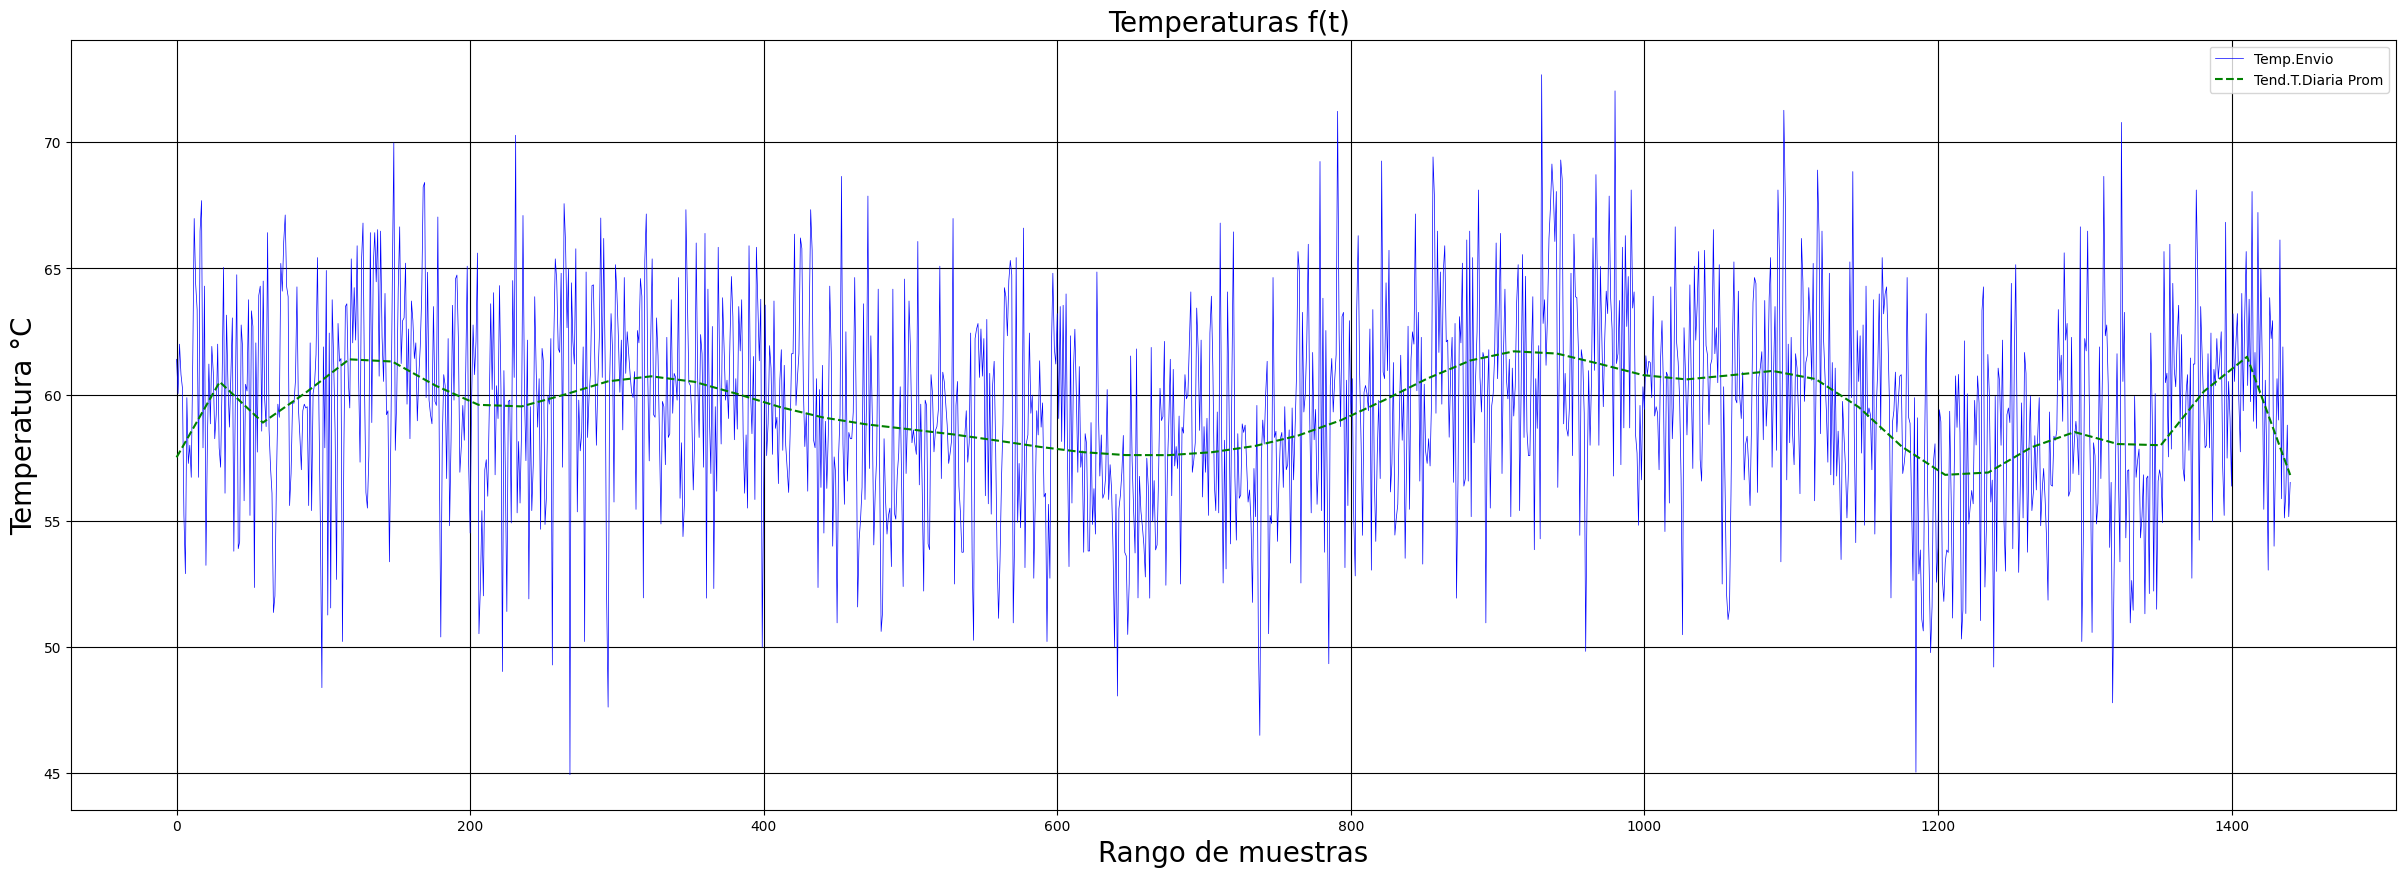

In [31]:
dfa = df.copy()
dfa['DISIPTOTAL'] = 0.0  # Inicializa la columna como float

for i in range(len(dfa)):
    valor = dfa['QENTRADA'][i]
    AUX = round(((valor / 3600) * 1000 * 4184 * (dfa['TRETORNO'][i] - dfa['TTORRE'][i])) / 1000000, 2)
    dfa.at[i, 'DISIPTOTAL'] = AUX  # Asigna el valor calculado a la columna 'DISIPTOTAL'

# Luego, muestra información sobre el DataFrame
dfa.info()
print(dfa)

# Grado del polinomio de tendencia (ajusta según tus necesidades)
grado_polinomio = 30

# Ajustar el polinomio de tendencia a los datos
coefficients = np.polyfit( dfa.index,dfa['DISIPTOTAL'], grado_polinomio)
polynomial = np.poly1d(coefficients)
x_trendline = np.linspace(dfa.index.min(), dfa.index.max())
y_trendline = polynomial(x_trendline)


from matplotlib.ticker import MaxNLocator

text='Caudal Nm3/h'
text1='Presión kg/cm2'
text2='Rango de muestras'
text3='Temperatura °C'

print('Cantidad de items sampleados: ', len(dfx.index))
print('Fecha de la muestra: ',dfx.date[0],'-',dfx.time[0], 'al',dfx.date[(len(dfx.index)-1)],'-',dfx.time[(len(dfx.index)-1)])

# Crear el gráfico
fig, (ax1) = plt.subplots(1, figsize=(30, 10))
ax1.plot(dfa.index, dfa['DISIPTOTAL'], linewidth=0.5, color='blue', label='Temp.Envio')
ax1.plot(x_trendline, y_trendline, label=f'Tend.T.Diaria Prom', color='green',linestyle='--')
ax1.set_title('Temperaturas f(t) ', fontsize=20)
ax1.set_xlabel(text2, fontsize=20)
ax1.set_ylabel(text3, fontsize=20)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))

labels2 = ax1.get_xticklabels()
labels3 = ax1.get_yticklabels()
plt.setp(labels3, fontsize=10, horizontalalignment='right')
ax1.axes.grid(True, which='minor', color='grey', axis='both')
ax1.axes.grid(True, which='major', color='black', axis='both')
ax1.legend()

# Mostrar el gráfico
plt.show()
